# Fraud detection by using Deep Learning

**Importing some libraries**

In [45]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

**Install tensorflow if it is not installed yet**

In [46]:
#!pip install tensorflow

In [47]:
import tensorflow as tf

In [48]:
# Version of tensorflow installed in this environment
print(tf.__version__)

1.14.0


**Reading data**

In [49]:
df = pd.read_csv('kaggle_data_fraud.csv')

In [50]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
2,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
3,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
4,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


**Dropping some columns that are not useful for the model**

In [51]:
df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'], inplace=True)

In [52]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.0,181.0,0.0,0.0,0.0,1
1,1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1
2,1,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,1
3,1,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,1
4,1,TRANSFER,20128.0,20128.0,0.0,0.0,0.0,1


## Using some visualization techniques to explore data 

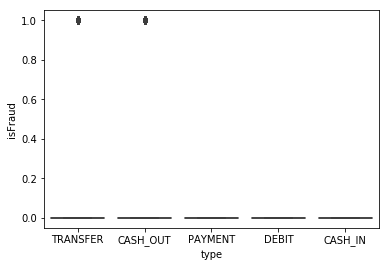

In [53]:
sns.boxplot(x="type", y="isFraud", data=df)

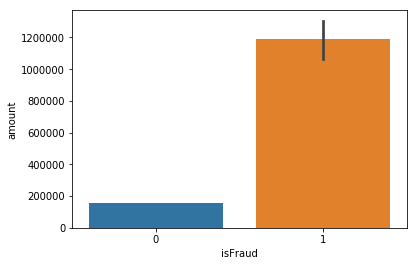

In [54]:
sns.barplot(x="isFraud", y="amount", data=df)

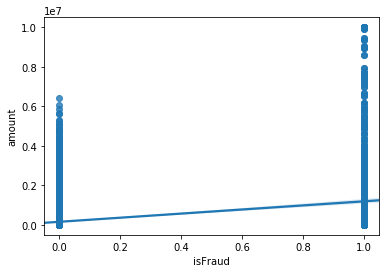

In [55]:
# Plotting correlation
ax = sns.regplot(x="isFraud", y="amount", data=df)

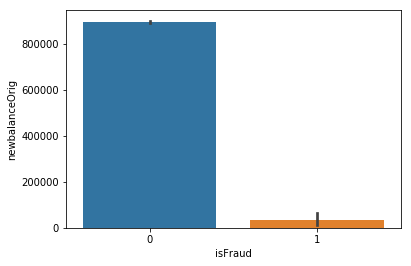

In [35]:
sns.barplot(x="isFraud", y="newbalanceOrig", data=df)

Splitting the features and targets

In [56]:
[m,n] = df.shape
X_data = df.iloc[0:m,0:6] # Features
y_data = df[['isFraud']] # Target

Convert column 'type' to dummy variables

In [57]:
dummy_type = pd.get_dummies(X_data['type'])
dummy_type.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,0,1


Drop column 'type' and concatenate the dummy variables 

In [58]:
X_data.drop(columns=['type'], inplace=True)
X_data = pd.concat([X_data, dummy_type], axis=1)
X_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,181.0,181.0,0.0,0.0,0,0,0,0,1
1,1,181.0,181.0,0.0,21182.0,0,1,0,0,0
2,1,2806.0,2806.0,0.0,0.0,0,0,0,0,1
3,1,2806.0,2806.0,0.0,26202.0,0,1,0,0,0
4,1,20128.0,20128.0,0.0,0.0,0,0,0,0,1


Convert Dataframe to numpy array

In [59]:
X_data = X_data.values
y_data = y_data.values

In [79]:
# Splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.40, random_state=1)

**Adding an early stop for training process when the training accuracy reaches 90%**

In [80]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.997):
      print("\nReached 99.7% accuracy so cancelling training!")
      self.model.stop_training = True

In [81]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [82]:
callbacks = myCallback()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
history = model.fit(X_train, y_train, epochs=20, callbacks=[callbacks], validation_data=(X_test, y_test))

test_loss = model.evaluate(X_test, y_test)

Train on 629145 samples, validate on 419430 samples
Epoch 1/20
629145/629145 [==============================] - 20s 33us/sample - loss: 132.9293 - acc: 0.9937 - val_loss: 122.8880 - val_acc: 0.9799
Epoch 2/20
629145/629145 [==============================] - 20s 32us/sample - loss: 75.5867 - acc: 0.9956 - val_loss: 19.6353 - val_acc: 0.9980
Epoch 3/20
629145/629145 [==============================] - 20s 32us/sample - loss: 62.0704 - acc: 0.9962 - val_loss: 12.9270 - val_acc: 0.9990
Epoch 4/20
629145/629145 [==============================] - 20s 32us/sample - loss: 54.7705 - acc: 0.9959 - val_loss: 8.7155 - val_acc: 0.9988
Epoch 5/20
629145/629145 [==============================] - 20s 32us/sample - loss: 58.4615 - acc: 0.9967 - val_loss: 29.9363 - val_acc: 0.9989
Epoch 6/20
629145/629145 [==============================] - 20s 32us/sample - loss: 58.5419 - acc: 0.9966 - val_loss: 12.2112 - val_acc: 0.9989
Epoch 7/20
628480/629145 [============================>.] - ETA: 0s - loss: 58.6385

In [84]:
acc = history.history[ 'acc']
val_acc  = history.history['val_acc']
loss = history.history[ 'loss']
val_loss = history.history['val_loss']
#print('All history: ', history, '\n')
print('Accuracy: ', acc, )
print('Validation accuracy: ', val_acc, '\n')
print('Loss: ', loss)
print('Validation loss: ', val_loss, '\n')
print('Model evaluation: ', test_loss)

Accuracy:  [0.9936803, 0.99557495, 0.99618846, 0.9959151, 0.99667645, 0.9966176, 0.9970786]
Validation accuracy:  [0.97986555, 0.9979687, 0.99896526, 0.99883175, 0.9988985, 0.9989438, 0.99617577] 

Loss:  [132.92934802484422, 75.58669332889156, 62.07043766592794, 54.77052370965268, 58.46148513936671, 58.54193419851541, 58.583180137936665]
Validation loss:  [122.88800260088847, 19.63527402162179, 12.926991641934057, 8.715520682125312, 29.936252879261975, 12.21123411643364, 20.20939367296773] 

Model evaluation:  [20.209393250544526, 0.99617577]


In [85]:
y_pred_DL = model.predict(X_test)
scores_DL = precision_recall_fscore_support(y_test, y_pred_DL.astype(int), average='binary')
scores_DL

(0.17561260210035007, 0.6501079913606912, 0.2765273311897106, None)

# Comparing with some methods in Scikit Learn

In [86]:
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


In [87]:
#clf_svm = svm.SVC(kernel='rbf', C=50000, gamma=0.9)
#clf_svm.fit(X_train, y_train)

clf_gnb = GaussianNB()
clf_gnb.fit(X_train, y_train)

/Users/rathapech/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [88]:
y_pred = clf_gnb.predict(X_test)

In [89]:
acc = accuracy_score(y_test, y_pred)
acc

0.9865770211954319

In [90]:
scores = precision_recall_fscore_support(y_test, y_pred, average='binary')

In [91]:
scores

(0.022016651248843663, 0.2570194384449244, 0.040558963871847306, None)

# Discussion

Remember the ratio between two classes is: 

In [92]:
(1-y_test.sum()/len(y_test))*100

99.88961209260187

The non-fraud transactions dominate the testing record up to 99%.

Although **Deep Learning** from **tensorflow** and **Naive Bayes** from **scikit-learn** produce high accuracies, we should not be misleaded by these results. The non-fraud transactions are much outnumber the fraud transactions. In other words, these two classes are very imbalanced. In this case, accuracy is not a good metric. We should check the precision, recall, and F-score produced by these methods. Since they are defined as:  

Accuracy = (TP + TN) / (TP + TN + FP + FN)  
Precision = TP/(TP + FP)  
Recall = TP/(TP_FN)  
F-Score = 2 * (Precision * Recall) / (Precision+Recall)

If any methods predict all the transactions in testing data as non-fraud transactions, they can easily obtain 99% accuracy. 

Therefore, based on the precision, recall, and F-score obtained from DL and Naive Bayes, DL performs better. 